In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
from scipy.sparse import lil_matrix, csr_matrix
%matplotlib inline

## 温度分布シミュレーション

In [2]:
alpha_water = 0.0000001466 #水の熱拡散係数
alpha_PDMS =  0.00000018
dt = 0.001
dx = 0.00015

small_mat = np.identity(200)*(-4)+np.tri(200,200,-1)-np.tri(200,200,-2)-np.tri(200,200,0)+np.tri(200,200,1)
def_mat = np.zeros((200*200, 200*200))
for i in range(200):
    for j in range(200):
        if i == j:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = small_mat
        if i-j == 1 or i-j == -1:
            def_mat[200*i:200*(i+1), 200*j:200*(j+1)] = np.identity(200)
            
alpha_mat = np.zeros((200*200, 200*200))
alpha_mat[0:200*13, 0:200*13] = np.identity(200*13) * alpha_PDMS
alpha_mat[200*13:, 200*13:] = np.identity(200*187) * alpha_water

In [3]:
def_mat_sparse = lil_matrix((200*200,200*200))
alpha_mat_sparse = lil_matrix((200*200,200*200))
def_mat_sparse = def_mat
alpha_mat_sparse = alpha_mat
alpha = alpha_mat_sparse.dot(def_mat_sparse)

In [50]:
cooling_temp = 20
time = 15000
temp_array = np.ones((200, 200)) * 310
temp_array[3:10, 85:115] = 273+cooling_temp
temp_array = temp_array.flatten()
np.save('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_0000.npy', temp_array)

for i in range(time):
    if i % 1000 == 0:
        print(i)
    temp_array = temp_array + dt/dx/dx*np.dot(alpha, temp_array)
    temp_array = temp_array.reshape((200, 200))
    temp_array[3:10, 85:115] = 273 + cooling_temp
    temp_array[:, 0] = 310
    temp_array[:, -1] = 310
    temp_array[0,:] = 298
    temp_array[-1, :] = 310
    temp_array = temp_array.flatten()
    np.save('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_%s.npy' % "{0:04d}".format(i+1), temp_array)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [16]:
temp = np.zeros((100, 200, 200))
for i in range(100):
#     temp[i] = np.load('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_%s.npy' % "{0:04d}".format(i)).reshape((200, 200))
    temp[i] = np.load('/mnt/recordings/AnalysisResult/Seno/simulation/temp/cooling_20/temp_%s.npy' % "{0:04d}".format(i)).reshape((200, 200))

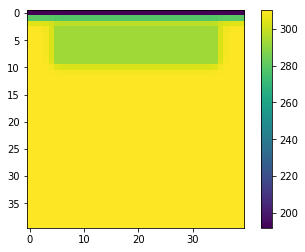

In [38]:
plt.imshow(temp[80, 0:40, 80:120])
plt.colorbar()
plt.show()